# 데이터 : Wellbeing_and_ Lifestyle data
# 분석 주제 : Predict stress levels or personal achievements with ML
    (1) 변수들간의 가장 강한 상관관계는 무엇인가?
    (2) stress, personal achievement의 가장 좋은 예측변수는 무엇인가?
    (3) 어떤 attributes가 균형 잡힌 삶을 가장 잘 정의할 수 있을까?
# 분석 목표
    사용자의 설문조사 결과를 입력하여 그들의 일상 스트레스와 성취도를 예측하고, 스트레스와 성취도를 향상시키기 위해 그들이 바꿀 수 있는 것을 추천
# EDA

In [1]:
import numpy as np
import pandas as pd
import re
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
from datetime import datetime
import os, random, math, time
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
import plotly.offline as py
from matplotlib import pyplot as pp
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tlsaa

plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
else:
    rc('font', family = 'AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# Warnings
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

* Target variables

1) Daily_stress : 매일 얼마나 많은 스트레스를 받는가? (0 : not much stress - 5 : a lot of stress)

2) Achievement : 얼마나 많은 놀라운 성과(지난 12개월동안 주변 지인들에게 알려진 개인적인 업적)들이 자랑스러운가? (0 : none - 10 achievements of more)

* Variables

1) Timestamp : 설문조사 날짜

2) Fruits_Veggies : 매일 얼마나 많은 양의 과일이나 채소를 먹는가? (0 : none - 5: servings per day)

3) Places_visited : 얼마나 많은 새로운 장소를 방문하는가? (0 : none - 10 new places or more)

4) Core_circle : 얼마나 많은 사람들과 매우 가깝게 지내는가? (0 : none - 10 people of more)

5) Supporting_others : 얼마나 많은 사람들을 돕는가? (0 : none - 10 people or more)

6) Social_network : 하루동안 몇 명의 사람들과 교류하는가? (0 : none - 10 persons or more)

7) Donation : 얼마나 많은 시간이나 돈을 기부하는가? (0 : none - 5 : or more)

8) BMI_range : 체질량지수(BMI) 범위는 얼마인가? (1 : below 25, 2 : above 25)

9) Todo_completed : 매주 해야 할 일 목록을 얼마나 잘 작성하고 있는가? (0 : not at all - 10 : very well)

10) Flow : 일반적으로 '흐름(어떤 활동을 하는 데 완전히 몰두하는 정신 상태-이 활동의 과정에서 활기찬 집중력과 참여, 즐거움을 경험)'을 경험하는 시간은 몇 시간인가? (0 : none - 10 hours per day or more)

11) Daily_steps : 매일 몇 걸음을 걷는가? (1 : less then 1,000 steps - 10 : 10,000 steps)

12) Live_vision : 인생비전은 몇 년이나 걸리나? (0 : i do not have a life vision - 10 years or more)

13) Sleep_hours : 보통 몇 시간 정도 자는가? (1 - 10 hours per night)

14) Lost_vacation : 매년 보통 며칠의 휴가를 놓치는가? (0 : none - 10 vacations days)

15) Daily_shouting : 얼마나 자주 누군가에게 소리를 지르거나 토라지는가? (0 : never - 10 times per week or more)

16) Sufficient_income : 기초적인 생활비를 충당하기에 수입은 얼마나 충분한가? (1 : not of hardly sufficient, 2 : sufficient)

17) Personal_awards : 평생 얼마나 많은 인정(전문지식과 참여를 검증하는 중요한 공적 인정 : 상, 학위, 발표, 메달)을 받았는가? (0 : none - 10 recognitions or more)

18) Time_for_passion : 매일 몇 시간 동안 열정을 쏟는가? (0 : none - 10 hours)

19) Weekly_mediation : 보통 한 주에 몇 번이나 자신에 대해 생각해 볼 기회가 있었는가? (0 : none - 10 times per week of more often)

20) Age : 나이 (1 : less than 20, 2: 21-35, 3 : 36-50, 4 : 51-more)

21) Gender : 성별 (0 : male, 1 : female)

22) Work_Life_balance_score : AH에 의해 계산된 점수


In [2]:
df = pd.read_csv('/Users/suyeon/Desktop/Yonsei/Course/21-2Bigdata/Wellbeing_and_lifestyle_data.csv')

In [3]:
df.head(5)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,609.5000
1,7/7/15,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6000
2,7/7/15,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female,631.6000
3,7/7/15,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female,622.7000
4,7/7/15,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female,663.9000


In [4]:
print(df.shape)

(15972, 24)


In [5]:
df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [6]:
# 대소문자 변경
df.columns = ['Timestamp', 'Fruits_Veggies', 'Daily_stress', 'Places_visited', 'Core_circle',
              'Supporting_others', 'Social_network', 'Achievement', 'Donation', 'BMI_range',
              'Todo_completed', 'Flow', 'Daily_steps', 'Live_vision', 'Sleep_hours', 'Lost_vacation',
              'Daily_shouting', 'Sufficient_income', 'Personal_awards', 'Time_for_passion',
              'Weekly_mediation', 'Age', 'Gender', 'Work_Life_balance_score']

In [7]:
# Timestamp : target 값에 영향을 미치지 않을 것이라고 판단하여 제거
# Work_Life_balance_score : 사용자 입력을 기준으로 설문조사가 제공하는 점수이므로 데이터 유출이 발생할 수 있다고 판단하여 제거

df = df.drop('Timestamp', axis = 1)
df = df.drop('Work_Life_balance_score', axis = 1)

In [8]:
# 범주화된 변수 컬럼명 추가
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1}) # 성별
df['Age'] = df['Age'].map({'Less than 20' : 0, '21 to 35' : 1, '36 to 50' : 2, '51 or more' : 3}) # 나이

In [9]:
# Daily_stress : int 변환
df = df[df.Daily_stress.apply(lambda x: x.isnumeric())]
df['Daily_stress'] = df['Daily_stress'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Fruits_Veggies     15971 non-null  int64
 1   Daily_stress       15971 non-null  int64
 2   Places_visited     15971 non-null  int64
 3   Core_circle        15971 non-null  int64
 4   Supporting_others  15971 non-null  int64
 5   Social_network     15971 non-null  int64
 6   Achievement        15971 non-null  int64
 7   Donation           15971 non-null  int64
 8   BMI_range          15971 non-null  int64
 9   Todo_completed     15971 non-null  int64
 10  Flow               15971 non-null  int64
 11  Daily_steps        15971 non-null  int64
 12  Live_vision        15971 non-null  int64
 13  Sleep_hours        15971 non-null  int64
 14  Lost_vacation      15971 non-null  int64
 15  Daily_shouting     15971 non-null  int64
 16  Sufficient_income  15971 non-null  int64
 17  Personal_awa

In [11]:
x_columns = ['Fruits_Veggies', 'Places_visited', 'Core_circle',
             'Supporting_others', 'Social_network', 'Donation', 'BMI_range',
             'Todo_completed', 'Flow', 'Daily_steps', 'Live_vision', 'Sleep_hours', 'Lost_vacation',
             'Daily_shouting', 'Sufficient_income', 'Personal_awards', 'Time_for_passion',
             'Weekly_mediation', 'Age', 'Gender']

In [12]:
y_columns = ['Daily_stress', 'Achievement']

### 피어슨 상관계수

In [13]:
df_corr = df.corr().sort_values(by = ['Daily_stress'])
df_corr[['Achievement', 'Daily_stress']]

,Achievement,Daily_stress
Weekly_mediation,0.1647,-0.2187
Todo_completed,0.3050,-0.1637
Time_for_passion,0.3689,-0.1581
Sleep_hours,0.0453,-0.1570
Sufficient_income,0.1138,-0.1446
Places_visited,0.2580,-0.1349
Live_vision,0.3207,-0.1342
Flow,0.3866,-0.1299
Core_circle,0.2895,-0.1202
Achievement,1.0000,-0.1109


### 컬럼별 시각화

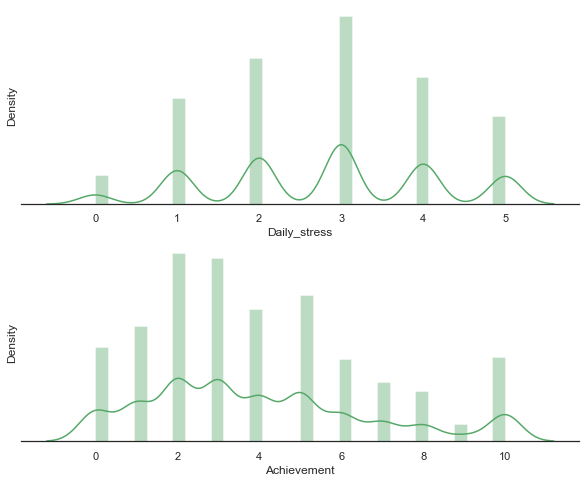

In [14]:
# Target variables
sns.set(style = 'white')
plt.figure(figsize = (10, 8))

plt.subplot(211)
sns.distplot(df[y_columns[0]], hist = True, color = 'g').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(212)
sns.distplot(df[y_columns[1]], hist = True, color = 'g').set_yticks([])
sns.despine(bottom = False, left = True)

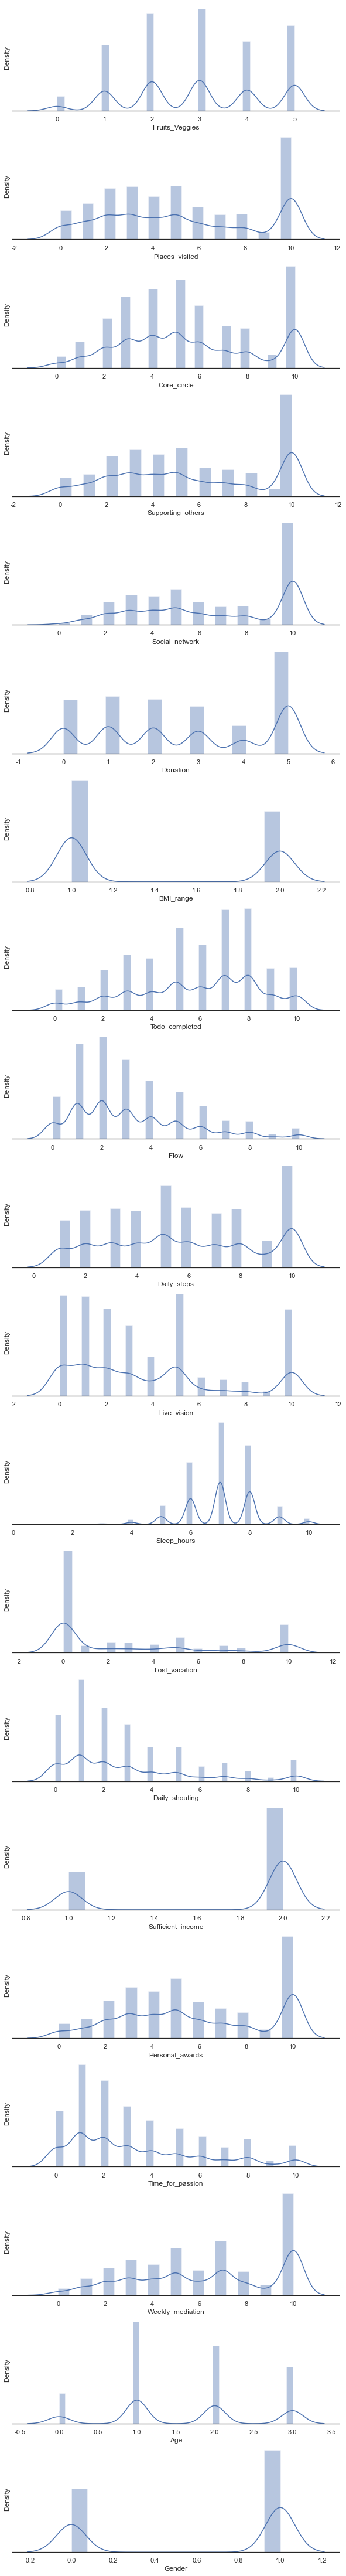

In [16]:
# Variables
n = len(x_columns)
plt.figure(figsize = (10, 4*n))

plt.subplot(n, 1, 1)
sns.distplot(df[x_columns[0]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 2)
sns.distplot(df[x_columns[1]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 3)
sns.distplot(df[x_columns[2]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 4)
sns.distplot(df[x_columns[3]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 5)
sns.distplot(df[x_columns[4]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 6)
sns.distplot(df[x_columns[5]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 7)
sns.distplot(df[x_columns[6]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 8)
sns.distplot(df[x_columns[7]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 9)
sns.distplot(df[x_columns[8]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 10)
sns.distplot(df[x_columns[9]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 11)
sns.distplot(df[x_columns[10]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 12)
sns.distplot(df[x_columns[11]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 13)
sns.distplot(df[x_columns[12]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 14)
sns.distplot(df[x_columns[13]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 15)
sns.distplot(df[x_columns[14]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 16)
sns.distplot(df[x_columns[15]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 17)
sns.distplot(df[x_columns[16]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 18)
sns.distplot(df[x_columns[17]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 19)
sns.distplot(df[x_columns[18]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)

plt.subplot(n, 1, 20)
sns.distplot(df[x_columns[19]], hist = True, color = 'b').set_yticks([])
sns.despine(bottom = False, left = True)


### Healthy body : How to keep our BMI under 25?

In [17]:
color_palette = ['#B3CDE3', '#FBB4AE', '#CCEBC5',
                  '#DECBE4', '#FED9A6', '#FFFFCC',
                  '#E5D8BD', '#FDDAEC', '#F2F2F2']
sns.set_palette(color_palette)

Text(0.5, 1.0, 'Age 그룹별 BMI 지수')

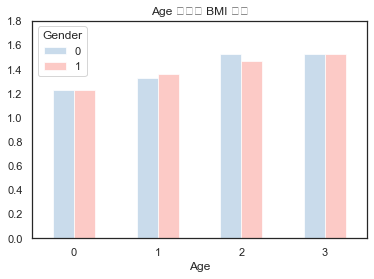

In [18]:
df1 = df.pivot_table(values = 'BMI_range', index = ['Age'], columns = ['Gender'])
df1.plot(kind = 'bar', alpha = 0.7, ylim = (0, 1.8))
plt.xticks(rotation = 0)
plt.title('Age 그룹별 BMI 지수')

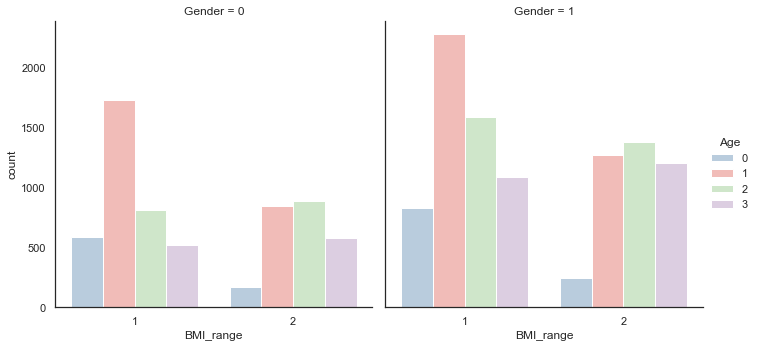

In [19]:
sns.catplot(x = 'BMI_range', kind = 'count', hue = 'Age', col = 'Gender', data = df)

<AxesSubplot:xlabel='Daily_steps', ylabel='BMI_range'>

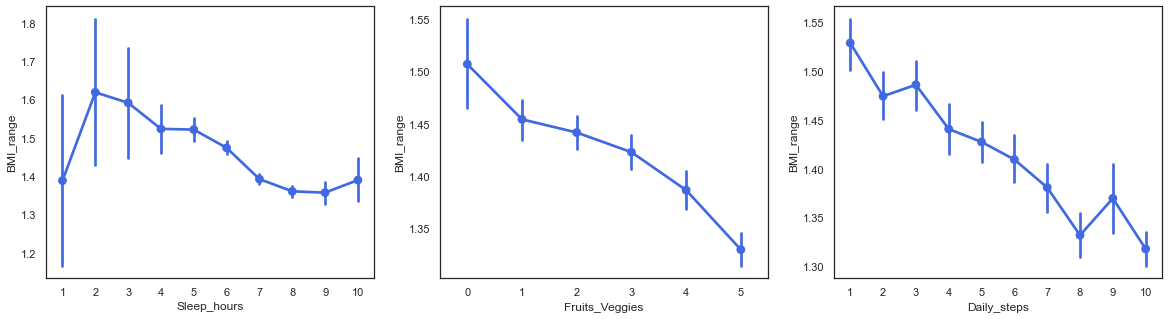

In [20]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
sns.pointplot(x = 'Sleep_hours', y = 'BMI_range', color = 'royalblue', data = df, ax = ax[0])
sns.pointplot(x = 'Fruits_Veggies', y = 'BMI_range', color = 'royalblue', data = df, ax = ax[1])
sns.pointplot(x = 'Daily_steps', y = 'BMI_range', color = 'royalblue', data = df, ax = ax[2])

* 전체적으로 남성보다 과체중인 여성이 더 많다
* 21~35세에서 여성의 BMI 지수가 더 높다
* 36~50세에서 남성의 BMI 지수가 더 높다
* 전반적으로 나이가 많아질수록 남성과 여성 모두 과체중인 사람이 늘어나는 경향이 있다
* BMI 지수는 매일의 과일과 야채 섭취와 매일 걷는 걸음수와 밀접한 상관관계가 있다
* 신체적 활동과 건강한 식습관은 낮은 BMI(즉, 건강한 몸)에 기여한다

### Healthy mind

Text(0.5, 1.0, 'Age 그룹별 daily Stress 지수')

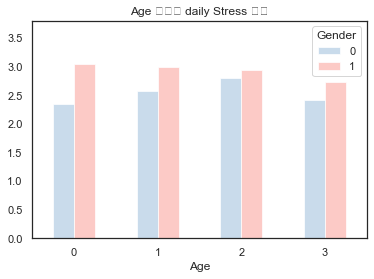

In [21]:
df2 = df.pivot_table(values = 'Daily_stress', index = ['Age'], columns = ['Gender'])
df2.plot(kind = 'bar', alpha = 0.7, ylim = (0, 3.8))
plt.xticks(rotation = 0)
plt.title('Age 그룹별 daily Stress 지수')

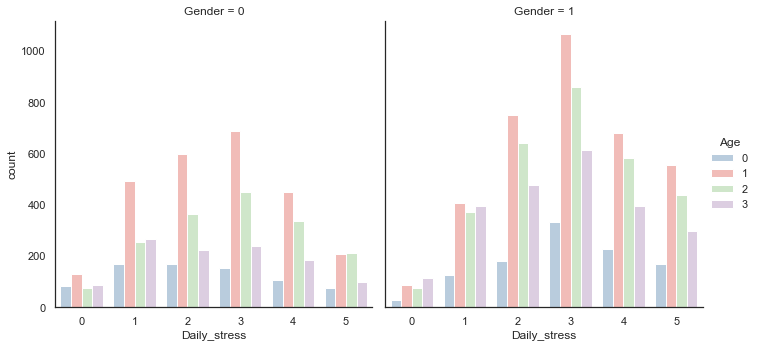

In [22]:
sns.catplot(x = 'Daily_stress', kind = 'count', hue = 'Age', col = 'Gender', data = df)

<AxesSubplot:xlabel='Weekly_mediation', ylabel='Daily_stress'>

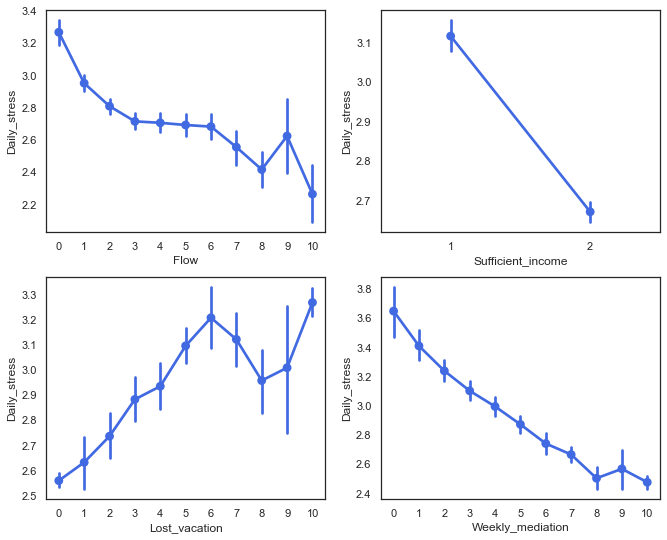

In [23]:
fig, ax = plt.subplots(2, 2, figsize = (11, 9))
sns.pointplot(x = 'Flow', y = 'Daily_stress', color = 'royalblue', data = df, ax = ax[0,0])
sns.pointplot(x = 'Sufficient_income', y = 'Daily_stress', color = 'royalblue', data = df, ax = ax[0,1])
sns.pointplot(x = 'Lost_vacation', y = 'Daily_stress', color = 'royalblue', data = df, ax = ax[1,0])
sns.pointplot(x = 'Weekly_mediation', y = 'Daily_stress', color = 'royalblue', data = df, ax = ax[1,1])

* 모든 연령대에서 여성의 스트레스 지수가 남성보다 더 높다
* 여성은 젊은 나이에 스트레스 지수가 최고조에 달하고 천천히 내려간다
* flow 능력, 충분한 수입, 휴가를 덜 잃는 것, 자신을 돌아보는 시간이 많은 것이 스트레스 수준을 낮추는 데 기여한다

### Expertise

Text(0.5, 1.0, 'Age 그룹별 Achievement')

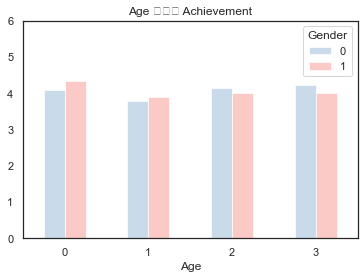

In [24]:
df3 = df.pivot_table(values = 'Achievement', index = ['Age'], columns = ['Gender'])
df3.plot(kind = 'bar', alpha = 0.7, ylim = (0, 6))
plt.xticks(rotation = 0)
plt.title('Age 그룹별 Achievement')

<AxesSubplot:xlabel='Todo_completed', ylabel='Achievement'>

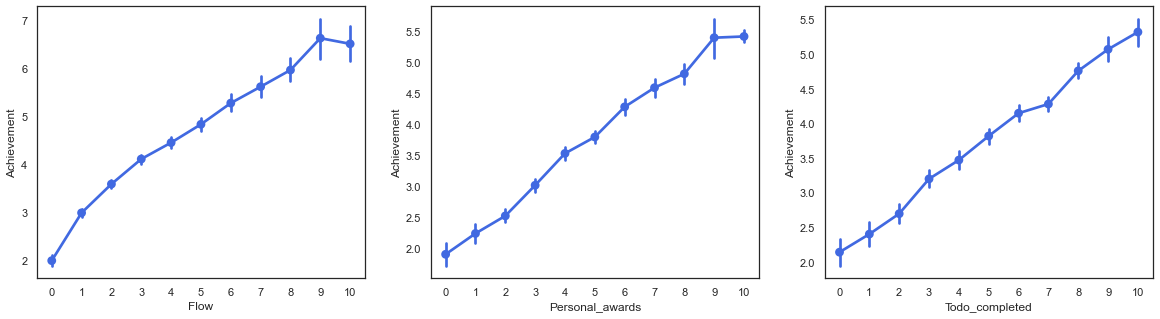

In [25]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
sns.pointplot(x = 'Flow', y = 'Achievement', color = 'royalblue', data = df, ax = ax[0])
sns.pointplot(x = 'Personal_awards', y = 'Achievement', color = 'royalblue', data = df, ax = ax[1])
sns.pointplot(x = 'Todo_completed', y = 'Achievement', color = 'royalblue', data = df, ax = ax[2])

* 여성은 젋은 나이에 개인적인 성취를 이룬 경우가 더 많다
* 남성은 36세 이후에 개인적인 성취를 이룬 경우가 더 많다
* flow 능력, 매주 일 목록 작성, 많은 인정이 성취 경험을 높이는 데 기여한다

### Connection

Text(0.5, 1.0, 'Age 그룹별 사람들과의 관계 형성')

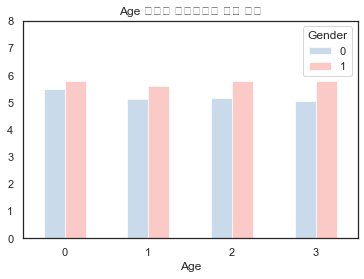

In [26]:
df4 = df.pivot_table(values = 'Core_circle', index = ['Age'], columns = ['Gender'])
df4.plot(kind = 'bar', alpha = 0.7, ylim = (0, 8))
plt.xticks(rotation = 0)
plt.title('Age 그룹별 사람들과의 관계 형성')

<AxesSubplot:xlabel='Social_network', ylabel='Core_circle'>

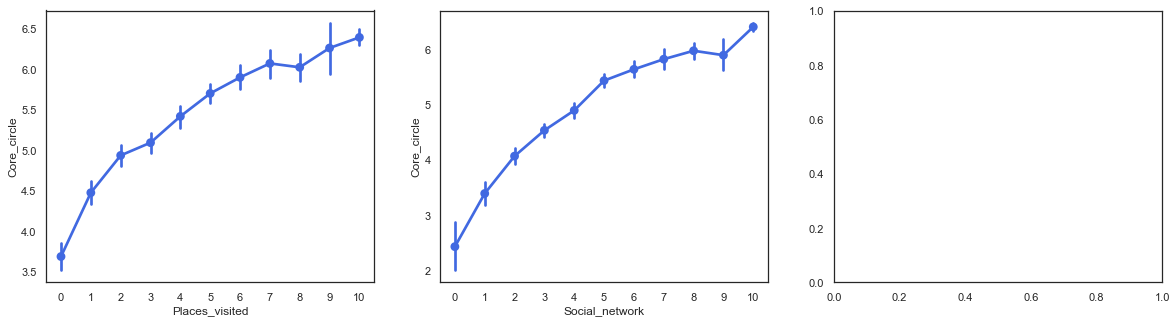

In [27]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
sns.pointplot(x = 'Places_visited', y = 'Core_circle', color = 'royalblue', data = df, ax = ax[0])
sns.pointplot(x = 'Social_network', y = 'Core_circle', color = 'royalblue', data = df, ax = ax[1])

* 여성이 남성보다 많은 사람들과의 관계 형성이 나타난다
* 새로운 장소를 많이 방문하는 것, 많은 사람들과 교류하는 것이 사람들과의 관계 형성 경험을 높이는 데 기여한다

### Passion

Text(0.5, 1.0, 'Age 그룹별 열정을 쏟는 시간')

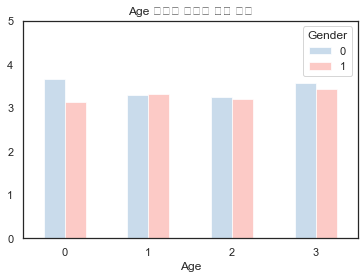

In [28]:
df5 = df.pivot_table(values = 'Time_for_passion', index = ['Age'], columns = ['Gender'])
df5.plot(kind = 'bar', alpha = 0.7, ylim = (0, 5))
plt.xticks(rotation = 0)
plt.title('Age 그룹별 열정을 쏟는 시간')

<AxesSubplot:xlabel='Weekly_mediation', ylabel='Time_for_passion'>

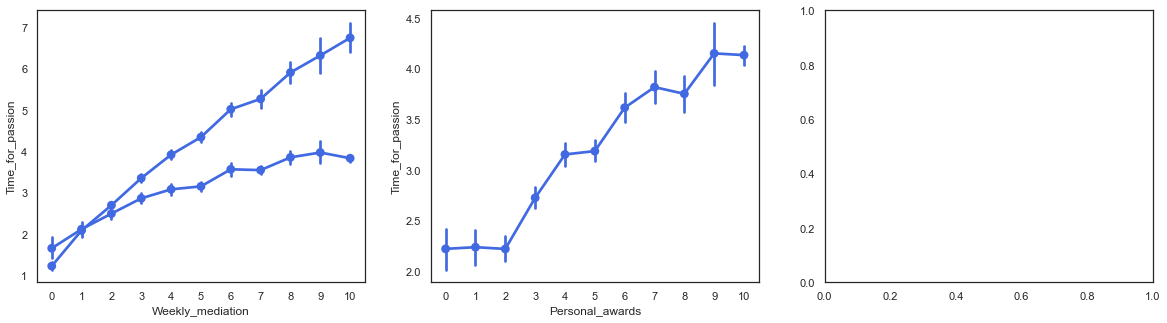

In [29]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
sns.pointplot(x = 'Flow', y = 'Time_for_passion', color = 'royalblue', data = df, ax = ax[0])
sns.pointplot(x = 'Personal_awards', y = 'Time_for_passion', color = 'royalblue', data = df, ax = ax[1])
sns.pointplot(x = 'Weekly_mediation', y = 'Time_for_passion', color = 'royalblue', data = df, ax = ax[0])

# Feature Importance

In [32]:
import eli5
from eli5.sklearn import PermutationImportance

## Daily Stress

In [33]:
X1 = df.drop(['Daily_stress'], axis = 1)
y1 = df['Daily_stress']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state = 1, test_size = 0.2)

In [35]:
s_model = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
s_per = PermutationImportance(s_model, n_iter = 10, random_state = 1).fit(X_test, y_test)
eli5.show_weights(s_per, feature_names = X_test.columns.tolist())

Weight,Feature
0.1392 ± 0.0243,Daily_shouting
0.0569 ± 0.0098,Lost_vacation
0.0486 ± 0.0106,Weekly_mediation
0.0260 ± 0.0079,Sleep_hours
0.0242 ± 0.0058,Gender
0.0185 ± 0.0060,Sufficient_income
0.0146 ± 0.0064,Time_for_passion
0.0108 ± 0.0031,Social_network
0.0099 ± 0.0059,Live_vision
0.0099 ± 0.0050,Supporting_others


* Daily stress 예측하는 모델에 강한 영향력을 미치는 변수 : Daily shouting, Lost vacation, Daily meditation, Gender, Sleep hours, Time for passion

## Achievement

In [36]:
X2 = df.drop(['Achievement'], axis = 1)
y2 = df['Achievement']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state = 1, test_size = 0.2)

In [38]:
a_model = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
a_per = PermutationImportance(a_model, n_iter = 10, random_state = 1).fit(X_test, y_test)
eli5.show_weights(a_per, feature_names = X_test.columns.tolist())

Weight,Feature
0.1099 ± 0.0152,Personal_awards
0.0516 ± 0.0113,Flow
0.0512 ± 0.0083,Live_vision
0.0468 ± 0.0116,Time_for_passion
0.0448 ± 0.0109,Supporting_others
0.0164 ± 0.0061,Places_visited
0.0162 ± 0.0072,Todo_completed
0.0120 ± 0.0027,Core_circle
0.0100 ± 0.0032,Social_network
0.0094 ± 0.0053,Daily_steps


* Achievement 예측하는 모델에 강한 영향력을 미치는 변수 : Personal awards, Flow, Time for passion, Live vision, Supporting others

# 모델링

- 모든 값을 정수로 변경하고, 불필요한 컬럼을 삭제할 것
- 피쳐의 크기 조정하고 데이터 분할할 것

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Target variable : Daily Stress

In [39]:
df['Daily_stress'] = df['Daily_stress'].astype(int)

In [40]:
X1 = df.drop(['Daily_stress'], axis = 1)
y1 = df['Daily_stress']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 1, test_size = 0.2)

Index(['Fruits_Veggies', 'Places_visited', 'Core_circle', 'Supporting_others',
       'Social_network', 'Achievement', 'Donation', 'BMI_range',
       'Todo_completed', 'Flow', 'Daily_steps', 'Live_vision', 'Sleep_hours',
       'Lost_vacation', 'Daily_shouting', 'Sufficient_income',
       'Personal_awards', 'Time_for_passion', 'Weekly_mediation', 'Age',
       'Gender'],
      dtype='object')

In [ ]:
X1.columns

In [41]:
for col in X1.columns:
    X1[col] = (X1[col] - X1[col].mean()) / X1[col].std()

In [44]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(12776, 21)
(3195, 21)
(12776,)
(3195,)


### (1) Linear Regression

In [56]:
LR = LinearRegression()
LR.fit(X1_train, y1_train)
y1_preds_LR = LR.predict(X1_test)

### (2) DecisionTree Regressor

In [57]:
DT = DecisionTreeRegressor()
DT.fit(X1_train, y1_train)
y1_preds_DT = DT.predict(X1_test)

### (3) RandomForest Regressor

In [58]:
RF = RandomForestRegressor()
RF.fit(X1_train, y1_train)
y1_preds_RF = RF.predict(X1_test)

### (4) ExtraTrees Regressor

In [59]:
ET = ExtraTreesRegressor()
ET.fit(X1_train, y1_train)
y1_preds_ET = ET.predict(X1_test)

### (5) XGB Regressor

In [61]:
XGB = XGBRegressor()
XGB.fit(X1_train, y1_train)
y1_preds_XGB = XGB.predict(X1_test)

### (6) LGBM Regressor

In [62]:
LGBM = LGBMRegressor()
LGBM.fit(X1_train, y1_train)
y1_preds_LGBM = LGBM.predict(X1_test)

In [63]:
print('LR RMSE : ', math.sqrt(metrics.mean_squared_error(y1_preds_LR, y1_test)))
print('DT RMSE : ', math.sqrt(metrics.mean_squared_error(y1_preds_DT, y1_test)))
print('RF RMSE :', math.sqrt(metrics.mean_squared_error(y1_preds_RF, y1_test)))
print('ET RMSE : ', math.sqrt(metrics.mean_squared_error(y1_preds_ET, y1_test)))
print('XGB RMSE : ', math.sqrt(metrics.mean_squared_error(y1_preds_XGB, y1_test)))
print('LGBM RMSE : ', math.sqrt(metrics.mean_squared_error(y1_preds_LGBM, y1_test)))

LR RMSE :  1.2144284445492937
DT RMSE :  1.7026169675946372
RF RMSE : 1.1914163399704865
ET RMSE :  1.1872654500263584
XGB RMSE :  1.2618582171463018
LGBM RMSE :  1.2028489958732713


## Target variable : Achievement

In [73]:
df['Achievement'] = df['Achievement'].astype(int)

In [74]:
X2 = df.drop(['Achievement'], axis = 1)
y2 = df['Achievement']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 1, test_size = 0.2)

In [75]:
X2.columns

Index(['Fruits_Veggies', 'Daily_stress', 'Places_visited', 'Core_circle',
       'Supporting_others', 'Social_network', 'Donation', 'BMI_range',
       'Todo_completed', 'Flow', 'Daily_steps', 'Live_vision', 'Sleep_hours',
       'Lost_vacation', 'Daily_shouting', 'Sufficient_income',
       'Personal_awards', 'Time_for_passion', 'Weekly_mediation', 'Age',
       'Gender'],
      dtype='object')

In [76]:
for col in X2.columns:
    X2[col] = (X2[col] - X2[col].mean()) / X2[col].std()

In [77]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(12776, 21)
(3195, 21)
(12776,)
(3195,)


### (1) Linear Regression

In [78]:
LR = LinearRegression()
LR.fit(X2_train, y2_train)
y2_preds_LR = LR.predict(X2_test)

### (2) DecisionTree Regressor

In [79]:
DT = DecisionTreeRegressor()
DT.fit(X2_train, y2_train)
y2_preds_DT = DT.predict(X2_test)

### (3) RandomForest Regressor

In [80]:
RF = RandomForestRegressor()
RF.fit(X2_train, y2_train)
y2_preds_RF = RF.predict(X2_test)

### (4) ExtraTrees Regressor

In [81]:
ET = ExtraTreesRegressor()
ET.fit(X2_train, y2_train)
y2_preds_ET = ET.predict(X2_test)

### (5) XGB Regressor

In [82]:
XGB = XGBRegressor()
XGB.fit(X2_train, y2_train)
y2_preds_XGB = XGB.predict(X2_test)

### (6) LGBM Regressor

In [83]:
LGBM = LGBMRegressor()
LGBM.fit(X2_train, y2_train)
y2_preds_LGBM = LGBM.predict(X2_test)

In [84]:
print('LR RMSE : ', math.sqrt(metrics.mean_squared_error(y2_preds_LR, y2_test)))
print('DT RMSE : ', math.sqrt(metrics.mean_squared_error(y2_preds_DT, y2_test)))
print('RF RMSE :', math.sqrt(metrics.mean_squared_error(y2_preds_RF, y2_test)))
print('ET RMSE : ', math.sqrt(metrics.mean_squared_error(y2_preds_ET, y2_test)))
print('XGB RMSE : ', math.sqrt(metrics.mean_squared_error(y2_preds_XGB, y2_test)))
print('LGBM RMSE : ', math.sqrt(metrics.mean_squared_error(y2_preds_LGBM, y2_test)))

LR RMSE :  2.2531262340667078
DT RMSE :  3.1733435909409313
RF RMSE : 2.221623425144103
ET RMSE :  2.2160705559436025
XGB RMSE :  2.347432076331859
LGBM RMSE :  2.2558431120652966
